In [104]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'Data')
# print(data_dir)

In [107]:
# read the model info, including the model name, the number of parameters, and the number of MACs
# read the model training info, including the training time, each layer's training time, the epoch time and the epoch energy data
data_model_dir = os.path.join(data_dir, 'model_info')
# read all the model info csv files
model_info_files = os.listdir(data_model_dir)
cifar100_dataset = pd.read_csv(os.path.join(data_model_dir, 'cifar100_datasetinfo.csv'))
cifar10_dataset = pd.read_csv(os.path.join(data_model_dir, 'cifar10_datasetinfo.csv'))
fashionmnist_modelinfo = pd.read_csv(os.path.join(data_model_dir, 'fashionmnist_datasetinfo.csv'))

In [108]:
# change the ResNet50 model name to ResNet_test
fashionmnist_modelinfo['Model'] = fashionmnist_modelinfo['Model'].str.replace('ResNet50', 'ResNet_test')
cifar100_dataset['Model'] = cifar100_dataset['Model'].str.replace('ResNet50', 'ResNet_test')
cifar10_dataset['Model'] = cifar10_dataset['Model'].str.replace('ResNet50', 'ResNet_test')

In [109]:
# fashionmnist_modelinfo

### consider only the MACs

In [110]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('ResNet_test')]
test2_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('VGG')]
test3_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod3')]
test4_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod7')]
test5_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod11')]
# concatenate the data
test_f = pd.concat([test1_f, test2_f, test3_f, test4_f, test5_f])
test_f

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.320000e+09,13870000.0,14077.76,256.90,1087.51,54.38,47.15,2.36,285.08,14.25,595.25,29.76,71.50,3.57
1,VGG11,7.580000e+09,128810000.0,27264.35,324.59,1667.45,83.37,47.60,2.38,477.64,23.88,939.96,47.00,110.53,5.53
2,VGG13,1.130000e+10,128990000.0,43858.97,350.60,2494.23,124.71,47.43,2.37,732.13,36.61,1468.48,73.42,152.73,7.64
3,VGG16,1.546000e+10,134300000.0,54043.96,360.06,2987.17,149.36,47.13,2.36,890.96,44.55,1778.02,88.90,179.09,8.95
11,GoogleNet_mod3,2.740000e+09,11710000.0,14491.21,295.74,972.61,48.63,47.04,2.35,241.73,12.09,528.99,26.45,69.87,3.49
15,GoogleNet_mod7,7.782400e+08,2790000.0,7291.01,260.39,549.10,27.46,48.52,2.43,126.08,6.30,238.34,11.92,52.26,2.61
19,GoogleNet_mod11,8.375600e+08,2100000.0,6546.48,233.81,551.85,27.59,45.21,2.26,123.27,6.16,244.83,12.24,53.48,2.67


In [111]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('ResNet_test')]
test2_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('VGG')]
test3_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod3')]
test4_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod7')]
test5_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod11')]
# concatenate the data
test_c = pd.concat([test1_c, test2_c, test3_c, test4_c, test5_c])
test_c

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.400000e+09,13920000.0,12656.49,222.06,1132.80,56.64,113.35,5.67,240.22,12.01,504.82,25.24,111.23,5.56
1,VGG11,7.640000e+09,129180000.0,23860.35,294.21,1618.57,80.93,114.94,5.75,398.29,19.91,784.64,39.23,149.39,7.47
2,VGG13,1.135000e+10,129360000.0,37894.64,326.68,2317.64,115.88,117.14,5.86,610.64,30.53,1224.06,61.20,191.93,9.60
3,VGG16,1.552000e+10,134670000.0,46992.02,340.52,2749.50,137.48,115.99,5.80,741.62,37.08,1505.22,75.26,216.65,10.83
11,GoogleNet_mod3,2.820000e+09,11820000.0,13115.96,253.47,1026.92,51.35,107.87,5.39,203.71,10.19,450.01,22.50,107.84,5.39
15,GoogleNet_mod7,8.570100e+08,2900000.0,7203.88,204.42,695.91,34.80,117.14,5.86,108.34,5.42,207.32,10.37,102.62,5.13
19,GoogleNet_mod11,9.162700e+08,2140000.0,6423.14,180.55,704.25,35.21,113.72,5.69,106.51,5.33,213.37,10.67,91.70,4.59


In [112]:
# seperate the vg model data and ResNet_test model data with the original data
test1_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('ResNet_test')]
test2_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('VGG')]
test3_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('GoogleNet_mod3')]
test4_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('GoogleNet_mod7')]
test5_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('GoogleNet_mod11')]
# concatenate the data
test_c10 = pd.concat([test1_c10, test2_c10, test3_c10, test4_c10, test5_c10])
test_c10

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.400000e+09,13870000.0,13659.01,243.07,1116.08,55.80,107.65,5.38,240.32,12.02,505.61,25.28,109.02,5.45
1,VGG11,7.640000e+09,128810000.0,23278.21,287.92,1606.05,80.30,108.81,5.44,400.34,20.02,791.01,39.55,144.95,7.25
2,VGG13,1.135000e+10,128990000.0,37208.57,312.94,2368.83,118.44,118.65,5.93,614.09,30.70,1262.21,63.11,196.39,9.82
3,VGG16,1.552000e+10,134300000.0,45489.22,330.24,2747.62,137.38,116.99,5.85,745.35,37.27,1492.82,74.64,220.31,11.02
11,GoogleNet_mod3,2.820000e+09,11710000.0,13005.22,253.53,1019.79,50.99,107.05,5.35,202.75,10.14,447.82,22.39,107.11,5.36
15,GoogleNet_mod7,8.569100e+08,2800000.0,6905.52,197.59,691.09,34.55,113.43,5.67,108.46,5.42,207.80,10.39,102.35,5.12
19,GoogleNet_mod11,9.162300e+08,2100000.0,6378.98,186.84,676.10,33.81,108.02,5.40,105.13,5.26,208.05,10.40,100.99,5.05


In [113]:
train_f = fashionmnist_modelinfo.drop(test_f.index)
train_c = cifar100_dataset.drop(test_c.index)
train_c10 = cifar10_dataset.drop(test_c10.index)

In [114]:
# find out the MACs of each model
macs_train_f = train_f['MACs'].values.reshape(-1, 1)
macs_test_f = test_f['MACs'].values.reshape(-1, 1)
macs_train_c = train_c['MACs'].values.reshape(-1, 1)
macs_test_c = test_c['MACs'].values.reshape(-1, 1)
macs_train_c10 = train_c10['MACs'].values.reshape(-1, 1)
macs_test_c10 = test_c10['MACs'].values.reshape(-1, 1)
# find out the energy of each model
energy_train_f = train_f['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_f = test_f['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_train_c = train_c['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_c = test_c['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_train_c10 = train_c10['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_c10 = test_c10['TotalEnergyPerEpoch'].values.reshape(-1, 1)

# print(macs_train_f,'\n','*'*50,'\n',macs_test_f)
# print('*'*50)
# print(energy_train_f, '\n','*'*50,'\n', energy_test_f)

In [115]:
# 对所有的macs_train的数据以及macs_test的数据进行归一化处理
macs_train_f = scaler.fit_transform(macs_train_f)
macs_test_f = scaler.fit_transform(macs_test_f)
macs_train_c = scaler.fit_transform(macs_train_c)
macs_test_c = scaler.fit_transform(macs_test_c)
macs_train_c10 = scaler.fit_transform(macs_train_c10)
macs_test_c10 = scaler.fit_transform(macs_test_c10)

In [116]:
model1_f = LinearRegression()
model1_f.fit(macs_train_f, energy_train_f)
predict1_f = model1_f.predict(macs_test_f)
r2_f = model1_f.score(macs_test_f, energy_test_f)

print(f'The predict values are: {predict1_f}')
print('*'*50)
print(f'The actual values are: {energy_test_f}')
print('*'*50)
print(f'The R2 score is: {r2_f}')

The predict values are: [[ 6720.19649467]
 [11296.79971297]
 [14533.48487876]
 [18153.00377384]
 [ 7085.62869081]
 [ 5378.74710725]
 [ 5430.36005457]]
**************************************************
The actual values are: [[14077.76]
 [27264.35]
 [43858.97]
 [54043.96]
 [14491.21]
 [ 7291.01]
 [ 6546.48]]
**************************************************
The R2 score is: -0.20989652780610935


In [117]:
model1_c = LinearRegression()
model1_c.fit(macs_train_c, energy_train_c)
predict1_c = model1_c.predict(macs_test_c)
r2_c = model1_c.score(macs_test_c, energy_test_c)

print(f'The predict values are: {predict1_c}')
print('*'*50)
print(f'The actual values are: {energy_test_c}')
print('*'*50)
print(f'The R2 score is: {r2_c}')

The predict values are: [[ 6419.63629029]
 [10294.56851729]
 [13038.07969327]
 [16121.75667545]
 [ 6730.22246115]
 [ 5278.6092527 ]
 [ 5322.43148243]]
**************************************************
The actual values are: [[12656.49]
 [23860.35]
 [37894.64]
 [46992.02]
 [13115.96]
 [ 7203.88]
 [ 6423.14]]
**************************************************
The R2 score is: -0.22336330500086943


In [118]:
model1_c10 = LinearRegression()
model1_c10.fit(macs_train_c10, energy_train_c10)
predict1_c10 = model1_c10.predict(macs_test_c10)
r2_c10 = model1_c10.score(macs_test_c10, energy_test_c10)

print(f'The predict values are: {predict1_c10}')
print('*'*50)
print(f'The actual values are: {energy_test_c10}')
print('*'*50)
print(f'The R2 score is: {r2_c10}')

The predict values are: [[ 6374.4395292 ]
 [10158.807211  ]
 [12838.19730633]
 [15849.80288517]
 [ 6677.7667098 ]
 [ 5260.00824559]
 [ 5302.84959881]]
**************************************************
The actual values are: [[13659.01]
 [23278.21]
 [37208.57]
 [45489.22]
 [13005.22]
 [ 6905.52]
 [ 6378.98]]
**************************************************
The R2 score is: -0.2459728941309305


In [119]:
def PlotMACs_vs_Energy(df, macs_test, energy_pred, energy_test, model_name):
    # first plot the MACs vs Energy of the training data, and then plot the MACs vs Energy of the test data and the predicted data in the same plot
    # set the prediction data as green, the test data as red, and the training data as blue
    # the predicted data is the linear regression model's prediction, and use the dot to represent the data
    extended_x_min = min(df['MACs'].min(), macs_test.min()) * 0.8  # slightly more than minimum
    extended_x_max = max(df['MACs'].max(), macs_test.max()) * 1.2  # slightly more than maximum

    # Generate extended x values
    extended_x = np.linspace(extended_x_min, extended_x_max, 100)  # generate 100 points for a smooth line
    plt.figure(figsize=(10, 6))
    plt.scatter(df['MACs'], df['TotalEnergyPerEpoch'], color='blue', label='Training Data')
    plt.scatter(macs_test, energy_test, color='red', label='Test Data')
    plt.scatter(macs_test, energy_pred, color='green', label='Predicted Data')
    # plot the predict line, with the model coefficient and intercept, plot it as green and extend the line
    model_coef = model_name.coef_
    model_intercept = model_name.intercept_
    extended_y = model_coef * extended_x + model_intercept
    plt.plot(extended_x, extended_y.reshape(-1,1), color='green', label='Regression Line')
    plt.xlabel('MACs')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()
    

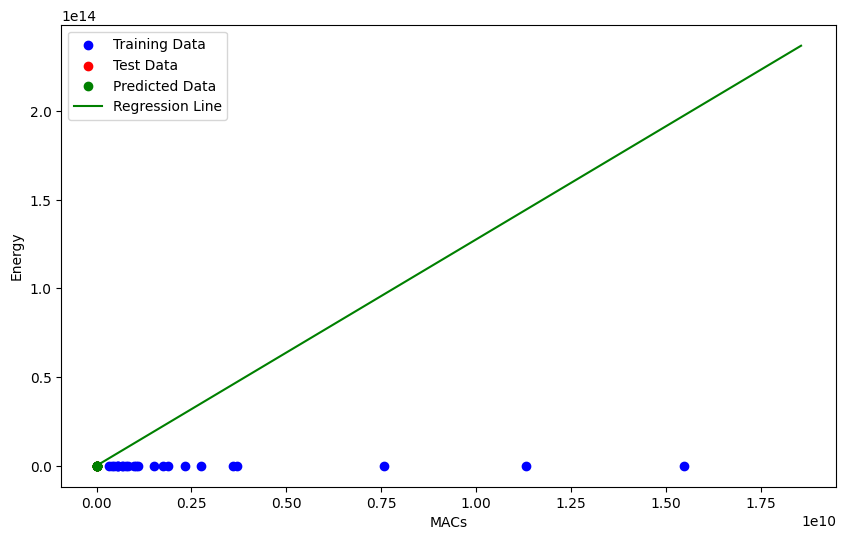

In [120]:
PlotMACs_vs_Energy(fashionmnist_modelinfo, macs_test_f, predict1_f, energy_test_f, model1_f)

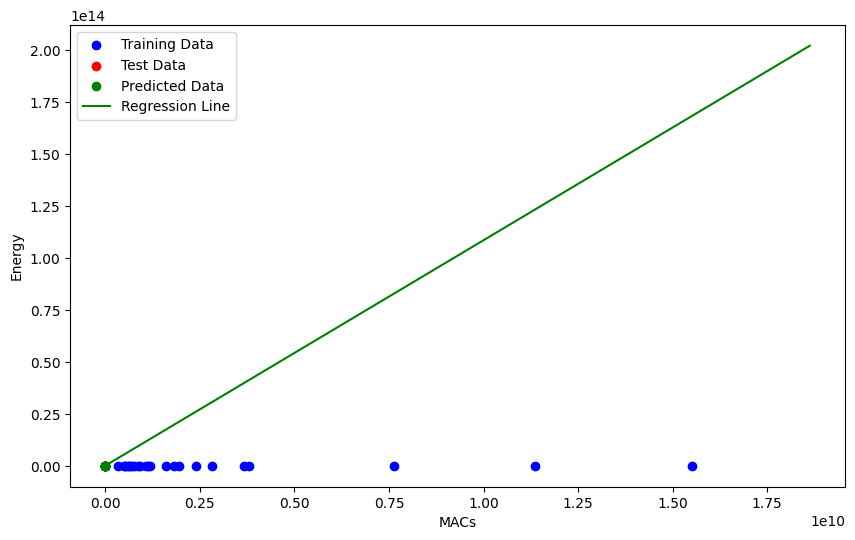

In [121]:
PlotMACs_vs_Energy(cifar100_dataset, 
                    macs_test_c, 
                     predict1_c, 
                  energy_test_c,
                  model1_c)

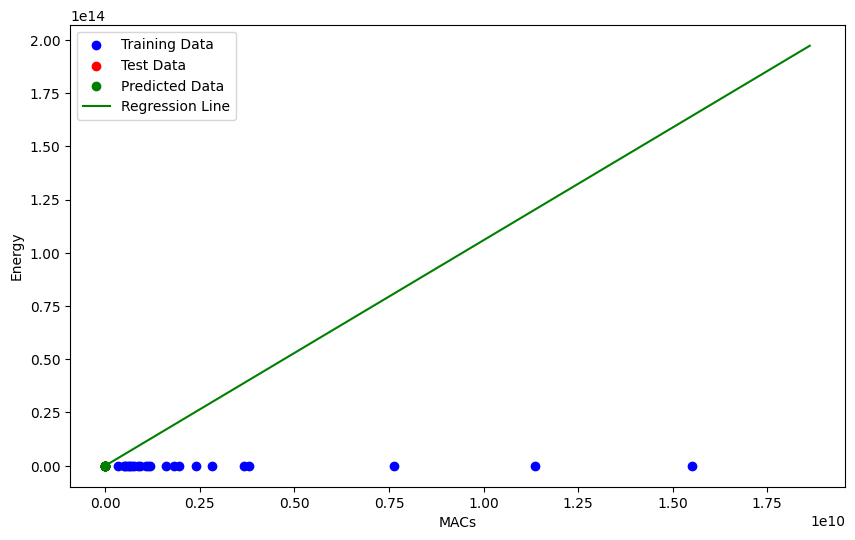

In [122]:
PlotMACs_vs_Energy(cifar10_dataset, 
                    macs_test_c10, 
                     predict1_c10, 
                  energy_test_c10,
                  model1_c10)

### Create a new ml model with more input dimension  
the train value include vgg11, let the test value is vgg16 only

In [123]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('ResNet_test')]
test2_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('VGG11')]
test3_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod3')]
test4_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod7')]
test5_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('GoogleNet_mod11')]
test6_f = fashionmnist_modelinfo[fashionmnist_modelinfo['Model'].str.contains('VGG16')]
# concatenate the data
test_f2 = pd.concat([test1_f, test2_f, test3_f, test4_f, test5_f, test6_f])
test_f2

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.320000e+09,13870000.0,14077.76,256.90,1087.51,54.38,47.15,2.36,285.08,14.25,595.25,29.76,71.50,3.57
1,VGG11,7.580000e+09,128810000.0,27264.35,324.59,1667.45,83.37,47.60,2.38,477.64,23.88,939.96,47.00,110.53,5.53
11,GoogleNet_mod3,2.740000e+09,11710000.0,14491.21,295.74,972.61,48.63,47.04,2.35,241.73,12.09,528.99,26.45,69.87,3.49
15,GoogleNet_mod7,7.782400e+08,2790000.0,7291.01,260.39,549.10,27.46,48.52,2.43,126.08,6.30,238.34,11.92,52.26,2.61
19,GoogleNet_mod11,8.375600e+08,2100000.0,6546.48,233.81,551.85,27.59,45.21,2.26,123.27,6.16,244.83,12.24,53.48,2.67
3,VGG16,1.546000e+10,134300000.0,54043.96,360.06,2987.17,149.36,47.13,2.36,890.96,44.55,1778.02,88.90,179.09,8.95


In [124]:
# seperate the vgg model data and ResNet_test model data with the original data
test1_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('ResNet_test')]
test2_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('VGG11')]
test3_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod3')]
test4_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod7')]
test5_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('GoogleNet_mod11')]
test6_c = cifar100_dataset[cifar100_dataset['Model'].str.contains('VGG16')]
# concatenate the data
test_c2 = pd.concat([test1_c, test2_c, test3_c, test4_c, test5_c, test6_c])
test_c2

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.400000e+09,13920000.0,12656.49,222.06,1132.80,56.64,113.35,5.67,240.22,12.01,504.82,25.24,111.23,5.56
1,VGG11,7.640000e+09,129180000.0,23860.35,294.21,1618.57,80.93,114.94,5.75,398.29,19.91,784.64,39.23,149.39,7.47
11,GoogleNet_mod3,2.820000e+09,11820000.0,13115.96,253.47,1026.92,51.35,107.87,5.39,203.71,10.19,450.01,22.50,107.84,5.39
15,GoogleNet_mod7,8.570100e+08,2900000.0,7203.88,204.42,695.91,34.80,117.14,5.86,108.34,5.42,207.32,10.37,102.62,5.13
19,GoogleNet_mod11,9.162700e+08,2140000.0,6423.14,180.55,704.25,35.21,113.72,5.69,106.51,5.33,213.37,10.67,91.70,4.59
3,VGG16,1.552000e+10,134670000.0,46992.02,340.52,2749.50,137.48,115.99,5.80,741.62,37.08,1505.22,75.26,216.65,10.83


In [125]:
# seperate the vgg model data and esNet_test model data with the original data
test1_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('ResNet_test')]
test2_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('VGG11')]
test3_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('GoogleNet_mod3')]
test4_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('GoogleNet_mod7')]
test5_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('GoogleNet_mod11')]
test6_c10 = cifar10_dataset[cifar10_dataset['Model'].str.contains('VGG16')]
# concatenate the data
test_c2_10 = pd.concat([test1_c10, test2_c10, test3_c10, test4_c10, test5_c10, test6_c10])
test_c2_10

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTimeperEpoch,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
6,ResNet_test,2.400000e+09,13870000.0,13659.01,243.07,1116.08,55.80,107.65,5.38,240.32,12.02,505.61,25.28,109.02,5.45
1,VGG11,7.640000e+09,128810000.0,23278.21,287.92,1606.05,80.30,108.81,5.44,400.34,20.02,791.01,39.55,144.95,7.25
11,GoogleNet_mod3,2.820000e+09,11710000.0,13005.22,253.53,1019.79,50.99,107.05,5.35,202.75,10.14,447.82,22.39,107.11,5.36
15,GoogleNet_mod7,8.569100e+08,2800000.0,6905.52,197.59,691.09,34.55,113.43,5.67,108.46,5.42,207.80,10.39,102.35,5.12
19,GoogleNet_mod11,9.162300e+08,2100000.0,6378.98,186.84,676.10,33.81,108.02,5.40,105.13,5.26,208.05,10.40,100.99,5.05
3,VGG16,1.552000e+10,134300000.0,45489.22,330.24,2747.62,137.38,116.99,5.85,745.35,37.27,1492.82,74.64,220.31,11.02


In [126]:
train_f2 = fashionmnist_modelinfo.drop(test_f2.index)
train_c2 = cifar100_dataset.drop(test_c2.index)
train_c2_10 = cifar10_dataset.drop(test_c2_10.index)

In [127]:
# find out the MACs of each model
macs_train_f2 = train_f2['MACs'].values.reshape(-1, 1)
macs_test_f2 = test_f2['MACs'].values.reshape(-1, 1)
macs_train_c2 = train_c2['MACs'].values.reshape(-1, 1)
macs_test_c2 = test_c2['MACs'].values.reshape(-1, 1)
macs_train_c2_10 = train_c2_10['MACs'].values.reshape(-1, 1)
macs_test_c2_10 = test_c2_10['MACs'].values.reshape(-1, 1)
# find out the energy of each model
energy_train_f2 = train_f2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_f2 = test_f2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_train_c2 = train_c2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_c2 = test_c2['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_train_c2_10 = train_c2_10['TotalEnergyPerEpoch'].values.reshape(-1, 1)
energy_test_c2_10 = test_c2_10['TotalEnergyPerEpoch'].values.reshape(-1, 1)

# print(macs_train_f,'\n','*'*50,'\n',macs_test_f)
# print('*'*50)
# print(energy_train_f, '\n','*'*50,'\n', energy_test_f)

In [128]:
# 对所有的macs_train的数据以及macs_test的数据进行归一化处理
macs_train_f2 = scaler.fit_transform(macs_train_f2)
macs_test_f2 = scaler.transform(macs_test_f2)
macs_train_c2 = scaler.fit_transform(macs_train_c2)
macs_test_c2 = scaler.transform(macs_test_c2)
macs_train_c2_10 = scaler.fit_transform(macs_train_c2_10)
macs_test_c2_10 = scaler.transform(macs_test_c2_10)


In [129]:
model2_f = LinearRegression()
model2_f.fit(macs_train_f2, energy_train_f2)
predict2_f = model2_f.predict(macs_test_f2)
r2_f2 = model2_f.score(macs_test_f2, energy_test_f2)

print(f'The predict values are: {predict2_f}')
print('*'*50)
print(f'The actual values are: {energy_test_f2}')
print('*'*50)
print(f'The R2 score is: {r2_f2}')

The predict values are: [[12610.81692572]
 [31156.15921725]
 [14091.62372466]
 [ 7174.98671062]
 [ 7384.13304232]
 [58938.91534982]]
**************************************************
The actual values are: [[14077.76]
 [27264.35]
 [14491.21]
 [ 7291.01]
 [ 6546.48]
 [54043.96]]
**************************************************
The R2 score is: 0.9739498269352302


In [130]:
model2_c = LinearRegression()
model2_c.fit(macs_train_c2, energy_train_c2)
predict2_c = model2_c.predict(macs_test_c2)
r2_c2 = model2_c.score(macs_test_c2, energy_test_c2)

print(f'The predict values are: {predict2_c}')
print('*'*50)
print(f'The actual values are: {energy_test_c2}')
print('*'*50)
print(f'The R2 score is: {r2_c2}')

The predict values are: [[11564.87418657]
 [27142.37764632]
 [12813.45270815]
 [ 6977.86425082]
 [ 7154.0327346 ]
 [50568.08895602]]
**************************************************
The actual values are: [[12656.49]
 [23860.35]
 [13115.96]
 [ 7203.88]
 [ 6423.14]
 [46992.02]]
**************************************************
The R2 score is: 0.9783959994187613


In [131]:
model2_c10 = LinearRegression()
model2_c10.fit(macs_train_c2_10, energy_train_c2_10)
predict2_c10 = model2_c10.predict(macs_test_c2_10)
r2_c2_10 = model2_c10.score(macs_test_c2_10, energy_test_c2_10)

print(f'The predict values are: {predict2_c10}')
print('*'*50)
print(f'The actual values are: {energy_test_c2_10}')
print('*'*50)
print(f'The R2 score is: {r2_c2_10}')

The predict values are: [[11409.203392  ]
 [26664.42426717]
 [12631.95010337]
 [ 6916.80286142]
 [ 7089.50127789]
 [49605.48161379]]
**************************************************
The actual values are: [[13659.01]
 [23278.21]
 [13005.22]
 [ 6905.52]
 [ 6378.98]
 [45489.22]]
**************************************************
The R2 score is: 0.9685670921483102


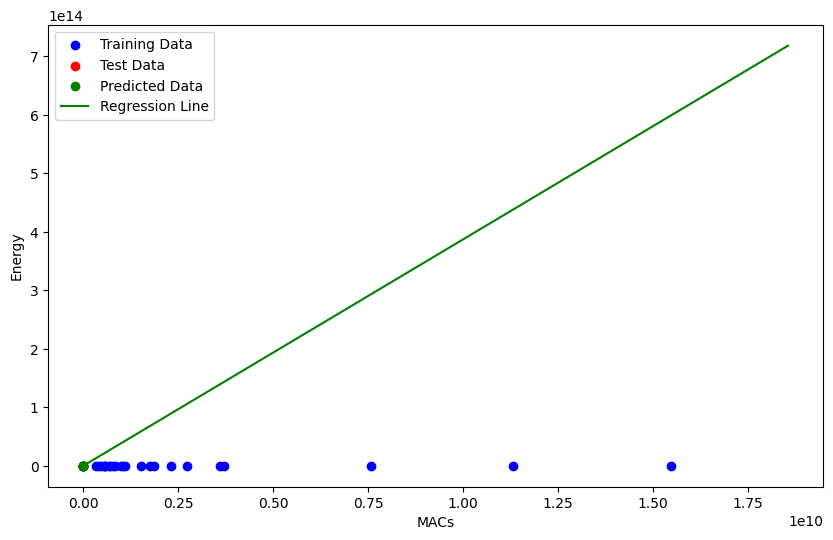

In [132]:
PlotMACs_vs_Energy(fashionmnist_modelinfo, macs_test_f2, predict2_f, energy_test_f2, model2_f)

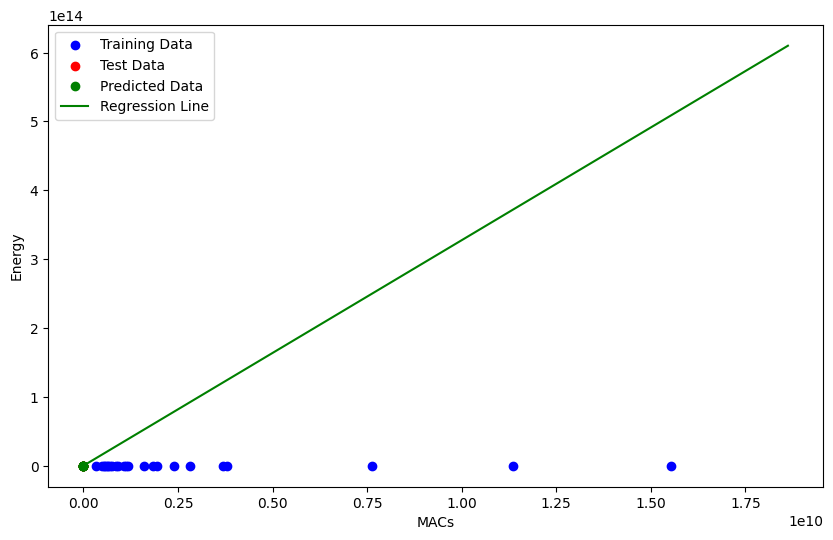

In [133]:
PlotMACs_vs_Energy(cifar100_dataset, macs_test_c2, predict2_c, energy_test_c2, model2_c)

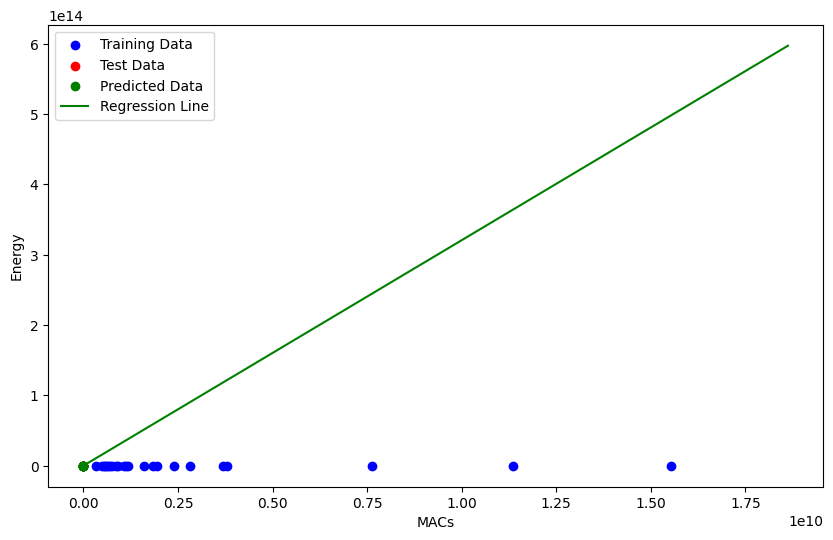

In [134]:
PlotMACs_vs_Energy(cifar10_dataset, macs_test_c2_10, predict2_c10, energy_test_c2_10, model2_c10)

#### try to put all the slope into 1 figure

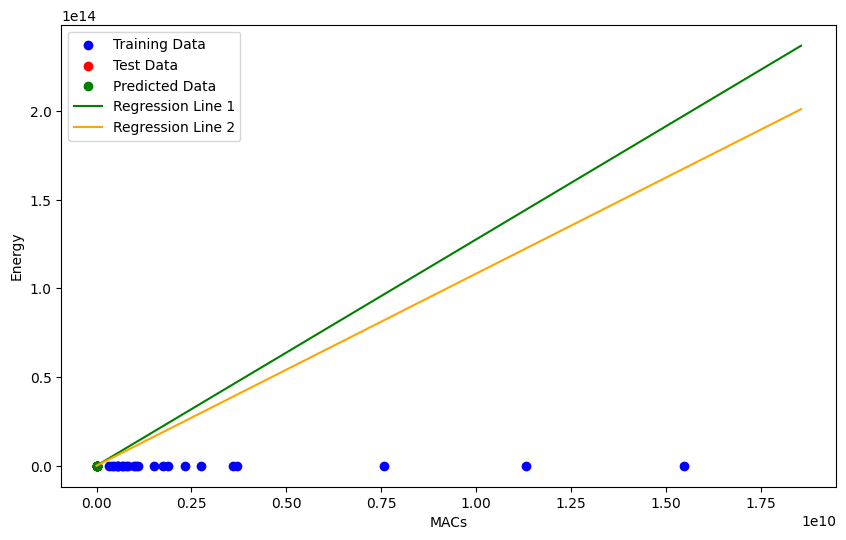

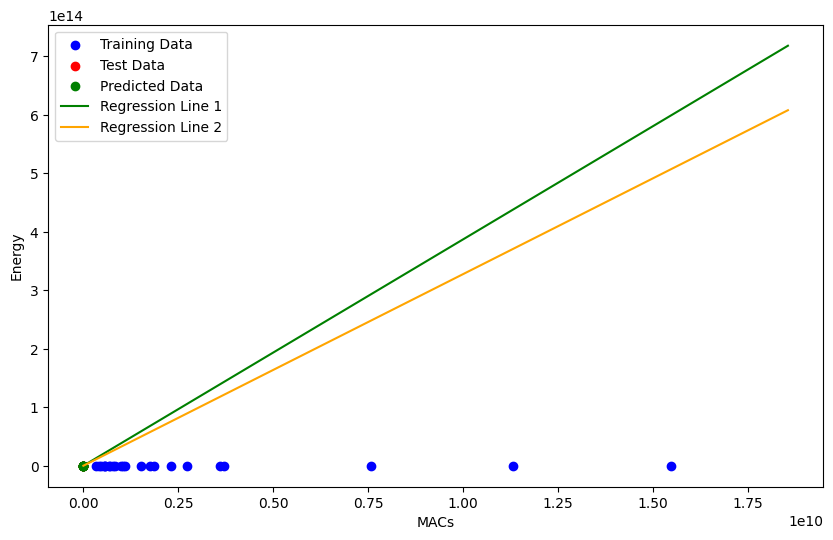

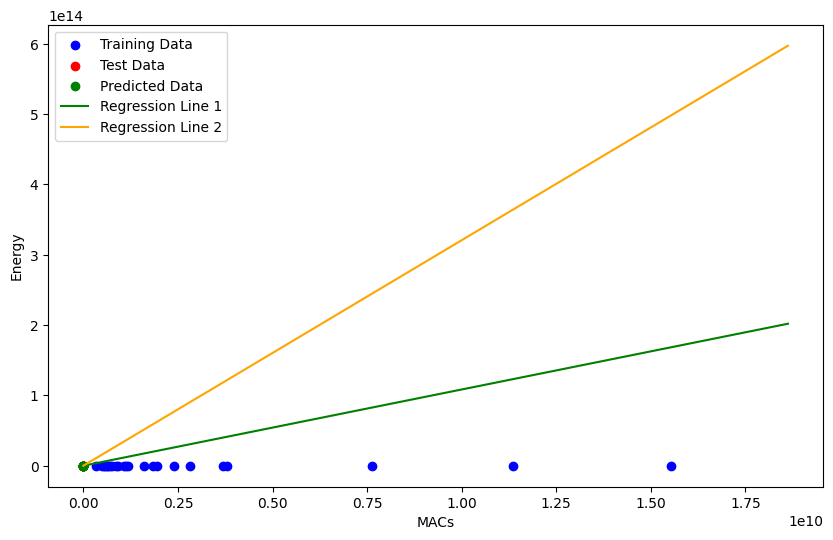

In [135]:
# def a function to plot the 2 models' coefficients and intercepts in the same plot
def plot_coef(df1, df2, macs_test1, energy_test1, energy_pred1, macs_test2, energy_test2, energy_pred2, model1, model2):
    extended_x_min1 = min(df1['MACs'].min(), macs_test1.min()) * 0.8
    extended_x_max1 = max(df1['MACs'].max(), macs_test1.max()) * 1.2
    extended_x1 = np.linspace(extended_x_min1, extended_x_max1, 100)
    plt.figure(figsize=(10, 6))
    plt.scatter(df1['MACs'], df1['TotalEnergyPerEpoch'], color='blue', label='Training Data')
    plt.scatter(macs_test1, energy_test1, color='red', label='Test Data')
    plt.scatter(macs_test1, energy_pred1, color='green', label='Predicted Data')
    model_coef1 = model1.coef_
    model_intercept1 = model1.intercept_
    model_coef2 = model2.coef_
    model_intercept2 = model2.intercept_
    extended_y1 = model_coef1 * extended_x1 + model_intercept1
    extended_y2 = model_coef2 * extended_x1 + model_intercept2
    plt.plot(extended_x1, extended_y1.reshape(-1,1), color='green', label='Regression Line 1')
    plt.plot(extended_x1, extended_y2.reshape(-1,1), color='orange', label='Regression Line 2')
    plt.xlabel('MACs')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()
    
plot_coef(fashionmnist_modelinfo, cifar100_dataset, macs_test_f, energy_test_f, predict1_f, macs_test_c, energy_test_c, predict1_c, model1_f, model1_c)
plot_coef(fashionmnist_modelinfo, cifar100_dataset, macs_test_f2, energy_test_f2, predict2_f, macs_test_c2, energy_test_c2, predict2_c, model2_f, model2_c)
plot_coef(cifar100_dataset, cifar10_dataset, macs_test_c2, energy_test_c2, predict2_c,macs_test_c2_10,energy_test_c2_10,predict2_c10, model1_c, model2_c10)

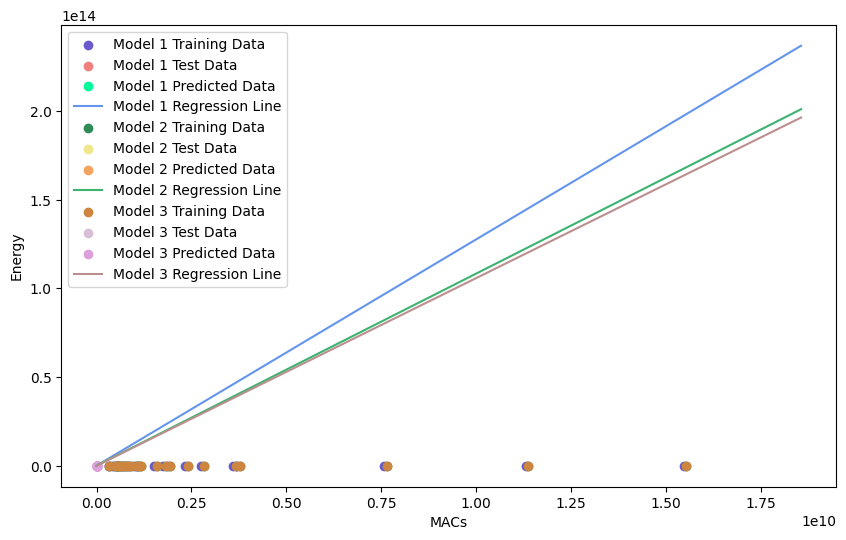

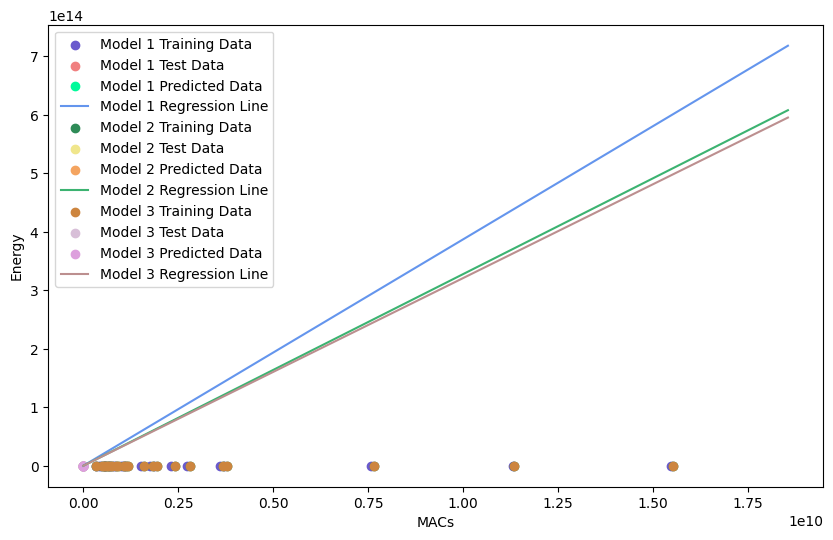

In [136]:
def plot_coef3(df1, df2, df3, 
               macs_test1, energy_test1, energy_pred1,
               macs_test2, energy_test2, energy_pred2, 
               macs_test3, energy_test3, energy_pred3, 
               model1, model2, model3):
    # Define the extended x-axis range for plotting
    extended_x_min1 = min(df1['MACs'].min(), macs_test1.min()) * 0.8
    extended_x_max1 = max(df1['MACs'].max(), macs_test1.max()) * 1.2
    extended_x1 = np.linspace(extended_x_min1, extended_x_max1, 100)

    # Set up plot
    plt.figure(figsize=(10, 6))
    
    # Define color palette with softer tones
    train_colors = ['slateblue', 'seagreen', 'peru']  # Softer colors for training data
    test_colors = ['lightcoral', 'khaki', 'thistle']  # Softer colors for test data
    pred_colors = ['mediumspringgreen', 'sandybrown', 'plum']  # Softer colors for prediction data
    line_colors = ['cornflowerblue', 'mediumseagreen', 'rosybrown']  # Softer colors for regression lines

    # Plotting data points and regression lines for each model
    datasets = [
        (df1, macs_test1, energy_test1, energy_pred1, model1, 'Model 1'),
        (df2, macs_test2, energy_test2, energy_pred2, model2, 'Model 2'),
        (df3, macs_test3, energy_test3, energy_pred3, model3, 'Model 3')
    ]

    for idx, (df, macs_test, energy_test, energy_pred, model, label) in enumerate(datasets):
        plt.scatter(df['MACs'], df['TotalEnergyPerEpoch'], color=train_colors[idx], label=f'{label} Training Data')
        plt.scatter(macs_test, energy_test, color=test_colors[idx], label=f'{label} Test Data')
        plt.scatter(macs_test, energy_pred, color=pred_colors[idx], label=f'{label} Predicted Data')

        # Regression line
        model_coef = model.coef_
        model_intercept = model.intercept_
        extended_y = model_coef * extended_x1 + model_intercept
        plt.plot(extended_x1, extended_y.reshape(-1,1), color=line_colors[idx], label=f'{label} Regression Line')

    # Setting labels and legend
    plt.xlabel('MACs')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()
    
plot_coef3(fashionmnist_modelinfo, cifar100_dataset, cifar10_dataset,
                macs_test_f, energy_test_f, predict1_f,
                macs_test_c, energy_test_c, predict1_c,
                macs_test_c10, energy_test_c10, predict1_c10,
                model1_f, model1_c, model1_c10)
plot_coef3(fashionmnist_modelinfo, cifar100_dataset, cifar10_dataset,
                macs_test_f2, energy_test_f2, predict2_f,
                macs_test_c2, energy_test_c2, predict2_c,
                macs_test_c2_10, energy_test_c2_10, predict2_c10,
                model2_f, model2_c, model2_c10)


In [137]:
# print each model's coefficient and intercept
print(f'The coefficient of traindata_type1_f is: {model1_f.coef_}')
print(f'The intercept of traindata_type1_f is: {model1_f.intercept_}')
print('*'*50)
print(f'The coefficient of traindata_type1_c is: {model1_c.coef_}')
print(f'The intercept of traindata_type1_c is: {model1_c.intercept_}')
print('*'*50)
print(f'The coefficient of traindata_type1_c10 is: {model1_c10.coef_}')
print(f'The intercept of traindata_type1_c10 is: {model1_c10.intercept_}')
print('*'*50)
print(f'The coefficient of traindata_type2_f is: {model2_f.coef_}')
print(f'The intercept of traindata_type2_f is: {model2_f.intercept_}')
print('*'*50)
print(f'The coefficient of traindata_type2_c is: {model2_c.coef_}')
print(f'The intercept of traindata_type2_c is: {model2_c.intercept_}')
print('*'*50)
print(f'The coefficient of traindata_type2_c10 is: {model2_c10.coef_}')
print(f'The intercept of traindata_type2_c10 is: {model2_c10.intercept_}')


The coefficient of traindata_type1_f is: [[12774.25666659]]
The intercept of traindata_type1_f is: [5378.74710725]
**************************************************
The coefficient of traindata_type1_c is: [[10843.14742274]]
The intercept of traindata_type1_c is: [5278.6092527]
**************************************************
The coefficient of traindata_type1_c10 is: [[10589.79463957]]
The intercept of traindata_type1_c10 is: [5260.00824559]
**************************************************
The coefficient of traindata_type2_f is: [[38691.64827656]]
The intercept of traindata_type2_f is: [5580.22830277]
**************************************************
The coefficient of traindata_type2_c is: [[32750.63081396]]
The intercept of traindata_type2_c is: [5420.85710634]
**************************************************
The coefficient of traindata_type2_c10 is: [[32073.40317763]]
The intercept of traindata_type2_c10 is: [5391.95037329]


In [138]:
model_coef_type1 = [model1_f.coef_, model1_c.coef_, model1_c10.coef_]
model_intercept_type1 = [model1_f.intercept_, model1_c.intercept_, model1_c10.intercept_]
model_coef_type2 = [model2_f.coef_, model2_c.coef_, model2_c10.coef_]
model_intercept_type2 = [model2_f.intercept_, model2_c.intercept_, model2_c10.intercept_]
print(model_coef_type1, '\n', model_intercept_type1, '\n', model_coef_type2, '\n', model_intercept_type2)

[array([[12774.25666659]]), array([[10843.14742274]]), array([[10589.79463957]])] 
 [array([5378.74710725]), array([5278.6092527]), array([5260.00824559])] 
 [array([[38691.64827656]]), array([[32750.63081396]]), array([[32073.40317763]])] 
 [array([5580.22830277]), array([5420.85710634]), array([5391.95037329])]


In [140]:
train_dataset_number = [60000, 50000, 50000]
test_dataset_number = [10000, 10000, 10000]
perimg_energy_type1 = [model_coef_type1[i]/train_dataset_number[i] for i in range(3)]
perimg_energy_type2 = [model_coef_type2[i]/train_dataset_number[i] for i in range(3)]
print(perimg_energy_type1, '\n', perimg_energy_type2)

[array([[0.21290428]]), array([[0.21686295]]), array([[0.21179589]])] 
 [array([[0.6448608]]), array([[0.65501262]]), array([[0.64146806]])]
